In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = sm.datasets.fair.load_pandas().data

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
data.shape

(6366, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [6]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [7]:
data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [8]:
data['affair'] = (data['affairs']>0).astype(int)

In [9]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

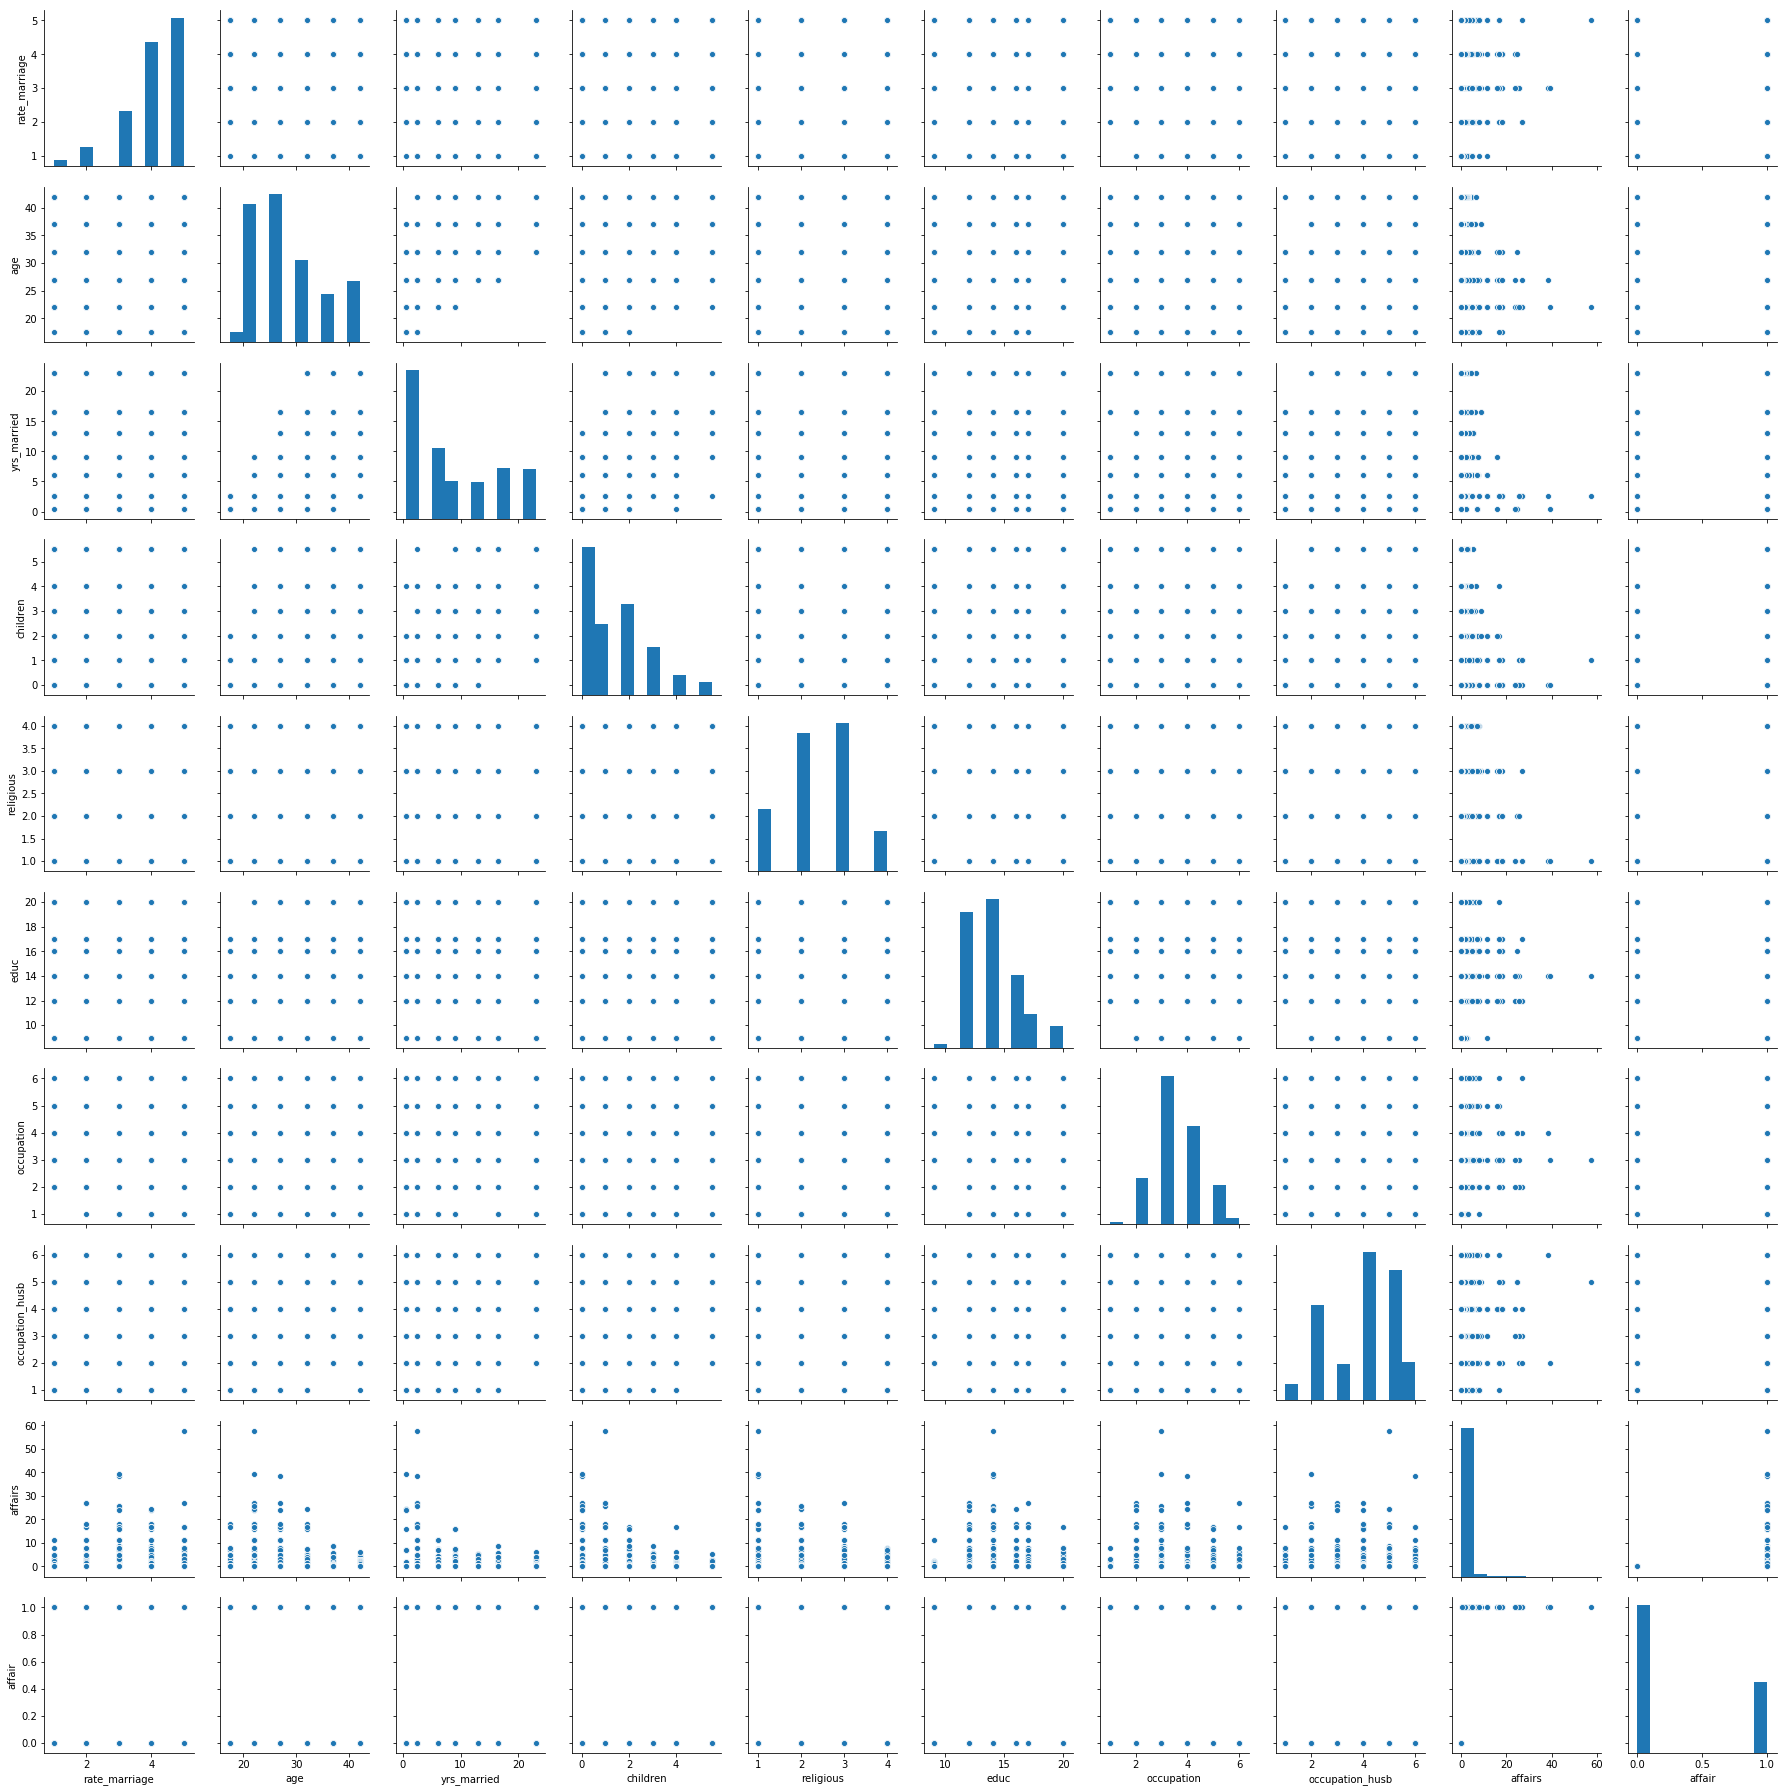

In [11]:
sns.pairplot(data)

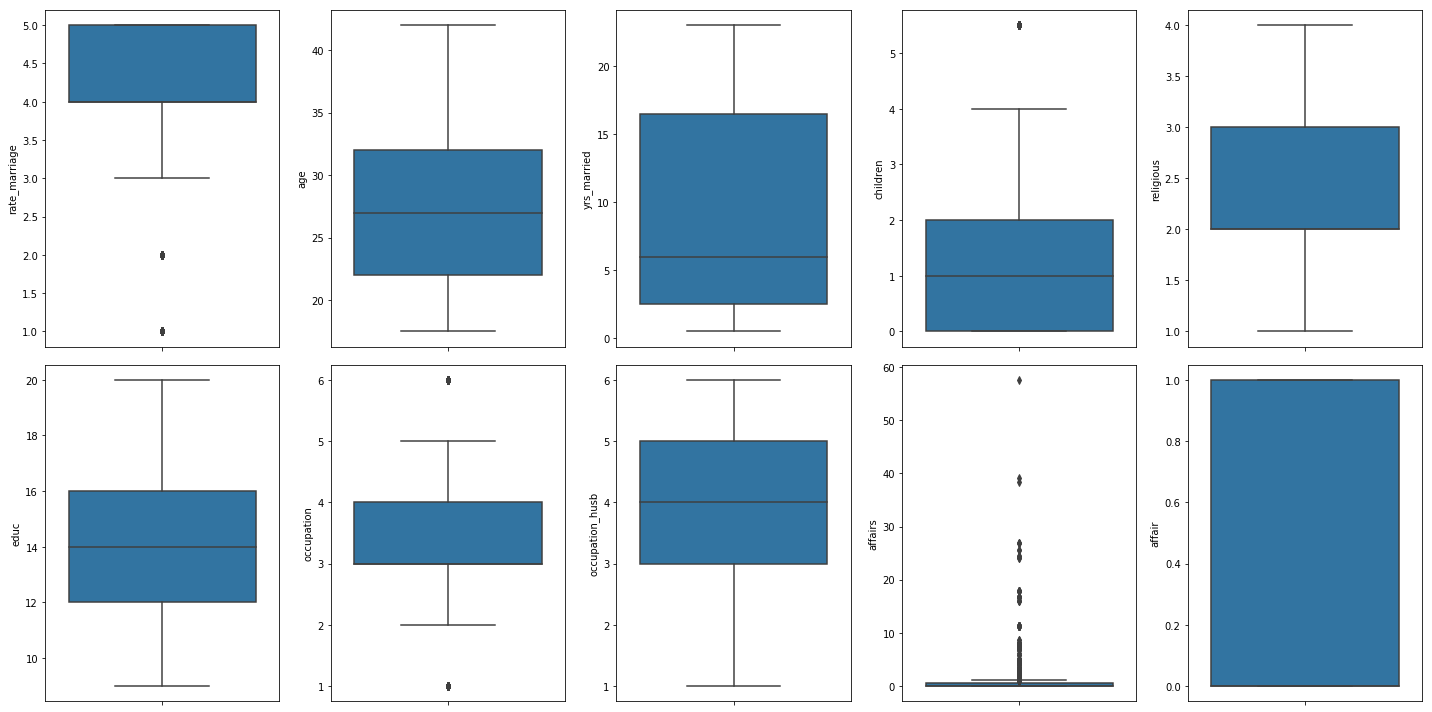

In [12]:
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,val in data.items():
    sns.boxplot(y=col,data=data,ax=ax[ind])
    ind+=1
plt.tight_layout()

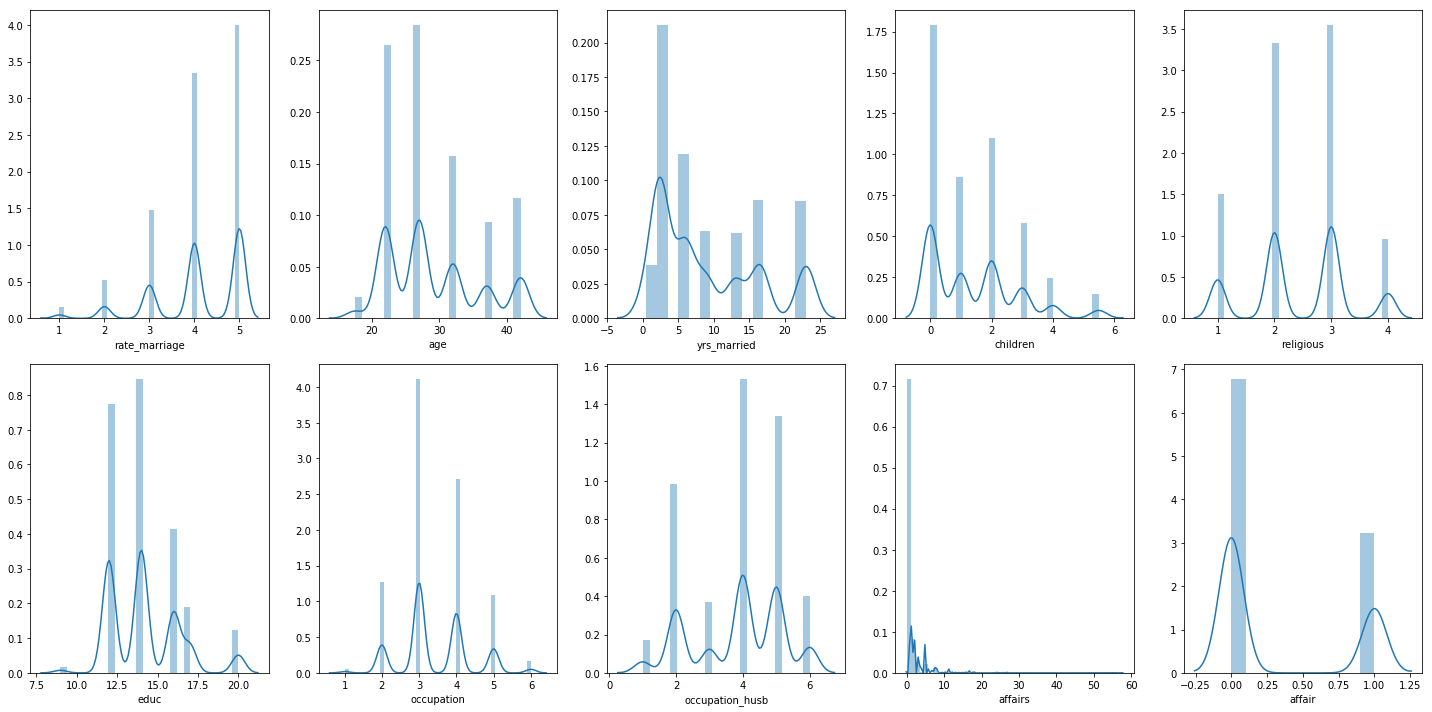

In [13]:
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,val in data.items():
    sns.distplot(val,ax=ax[ind])
    ind+=1
plt.tight_layout()

In [14]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [15]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_scaled=scaler.fit_transform(x)

In [20]:
x_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -1.51129246e+00,  8.54069123e-01, -2.69727036e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -4.50087100e-01,  1.11309009e-01,  1.14623935e+00],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01,  8.54069123e-01,  3.15280273e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01, -2.11697133e+00, -3.20158710e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -4.50087100e-01,  1.11309009e-01, -3.20158710e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -1.51129246e+00,  1.11309009e-01, -3.20158710e-01]])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=737)

In [24]:
print(len(x_train))
print(len(x_test))

4456
1910


In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred=model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [29]:
cm=confusion_matrix(y_test,pred)
cm

array([[1311,    0],
       [  83,  516]], dtype=int64)

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1311
           1       1.00      0.86      0.93       599

   micro avg       0.96      0.96      0.96      1910
   macro avg       0.97      0.93      0.95      1910
weighted avg       0.96      0.96      0.96      1910



In [31]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.956544502617801

In [32]:
auc=roc_auc_score(y_test,pred)
auc

0.9307178631051753

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [34]:
fpr

array([0., 0., 1.])

In [35]:
tpr

array([0.        , 0.86143573, 1.        ])

In [36]:
thresholds

array([2, 1, 0])

In [37]:
model.score(x_train,y_train)

0.9564631956912029

In [38]:
model.score(x_test,y_test)

0.956544502617801

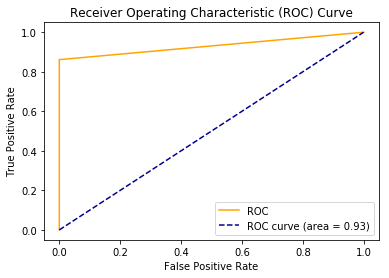

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [40]:
param = [{'C':[1,5,10,50,99]}]
param

[{'C': [1, 5, 10, 50, 99]}]

In [41]:
model1 = LogisticRegression()

In [42]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
mod = GridSearchCV(model1,param_grid=param,scoring='f1',cv=5)

In [44]:
mod.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 5, 10, 50, 99]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [45]:
mod.best_params_

{'C': 99}

In [46]:
mod.score(x_train,y_train)

0.9881697981906751

In [47]:
mod.score(x_test,y_test)

0.9864636209813874

In [48]:
ypred=mod.predict(x_test)
ypred

array([1, 0, 1, ..., 0, 1, 0])

In [49]:
confusion_matrix(y_test,ypred)

array([[1311,    0],
       [  16,  583]], dtype=int64)

In [50]:
accuracy_score(y_test,ypred)

0.9916230366492147

In [51]:
aucc=roc_auc_score(y_test,ypred)
aucc

0.986644407345576

In [52]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1311
           1       1.00      0.97      0.99       599

   micro avg       0.99      0.99      0.99      1910
   macro avg       0.99      0.99      0.99      1910
weighted avg       0.99      0.99      0.99      1910



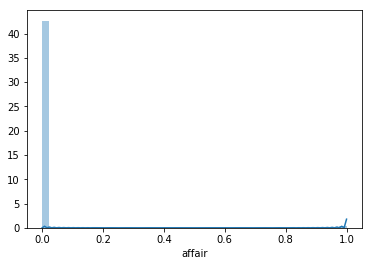

In [53]:
sns.distplot(y_test-ypred)

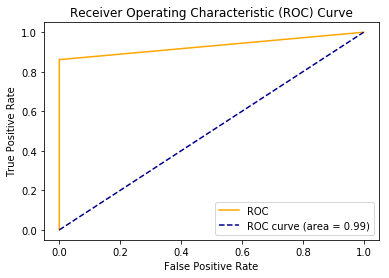

In [56]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % aucc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()